# Homework 3
Noam Yan

## Problem 1

1a) Since the confusion matrix is provided. It is esay to get the accuracy. NN makes 8 mistakes and NA makes 12 mistakes, so NN makes fewer mistakes.<br>
1b) Considering the preference of accuracy of birds, we tend to use NA to maximize the recall regardless of the precision. <br>
1c) To reproduce the truth table with new input, we need to calculate the recall for NN and NA and naively assume the model will predict with same performance.



In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [4]:
# 
NN_tp,NN_fp,NN_fn,NN_tn = 45,5,3,47
NA_tp,NA_fp,NA_fn,NN_tn = 47,11,1,42
NN_prec = NN_tp/(NN_tp+NN_fp)
NN_rec = NN_tp/(NN_tp+NN_fp)

NA_prec = NA_tp/(NA_tp+NA_fp)
NA_rec = NA_tp/(NA_tp+NA_fp)


In [10]:
men = 100*.01
birds = 100*.99
NN_newTp = NN_rec*birds
NN_newFp = NN_newTp / NN_prec - NN_newTp
NN_newTp
NN_prec

0.9

## Problem 2
2a)

In [15]:
def _conv (xrange, sumOrAvg, pdf, times):
    '''
    sumOrAvg:  0 means sum, 1 means Avg.
    times: can be a list or an integer.
    '''
    conv_pdf = pdf
    if type(times) is int:
        for i in range(times-1):
            conv_pdf = np.convolve(conv_pdf,pdf)
        conv_xrange = np.linspace(xrange[0]*times,xrange[-1]*times, conv_pdf.shape[0]) if sumOrAvg==0 else np.linspace(xrange[0],xrange[-1], conv_pdf.shape[0])
        return conv_xrange, conv_pdf                                                                                                               
    else:
        ans_dist = {"conv_xrange":[], "conv_pdf":[]}                                                                                                               
        for i in times:
            for j in range(i-1):
                conv_pdf = np.convolve(conv_pdf,pdf)
            conv_xrange = np.linspace(xrange[0]*i,xrange[-1]*i, conv_pdf.shape[0]) if sumOrAvg==0 else np.linspace(xrange[0],xrange[-1], conv_pdf.shape[0])
            ans_dist['conv_xrange'].append(conv_xrange)
            ans_dist['conv_pdf'].append(conv_pdf)
        return ans_dist['conv_xrange'], ans_dist['conv_pdf']

In [16]:
xrange = np.arange(0,5,1e-2)
pdf = stats.expon.pdf(xrange)
sum_xrange, sum_pdf = _conv(xrange,0,pdf,2)

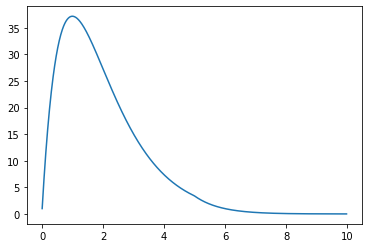

In [18]:
fig,ax = plt.subplots(1,1)
ax.plot(sum_xrange,sum_pdf)

Just like Prof.Morales showed in the second lecture, it is a Rayleigh distribution.<br> 
2b)

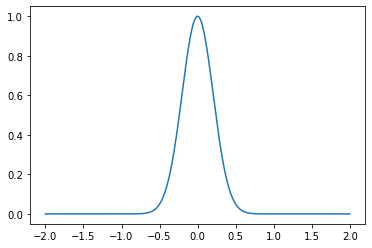

In [58]:
xrange1 = np.linspace(-10,10,1000)
xrange2 = np.linspace(-2,2,1000)

pdf1 = stats.norm.pdf(xrange1)
pdf2 = stats.norm.pdf(xrange2)
cauchy_pdf = stats.cauchy.pdf(xrange,scale=.2)
new_pdf = pdf1/pdf2
fig,ax = plt.subplots(1,1)
ax.plot(xrange2,new_pdf)
# ax.plot(xrange,cauchy_pdf)

This is an uniform distribution located at 1.<br>
2c)

In [43]:
xrange1.shape

(1000,)